In [1]:
%load_ext autoreload
%autoreload 2
import pickle
import IPython.display as ipd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from utils.data import *

In [2]:
folder = 'theorytab'

In [3]:
with open(f'./data/dataframes/{folder}/all_melodies.pkl', 'rb') as f:
    songs = pickle.load(f)
dfs = [item[0] for item in songs]
len(dfs)

9620

In [4]:
# path = f'./data/{folder}/'
# songs = get_dfs_from_midi(path, min_notes=30, min_gap=0., melody_only=True)
# dfs = [item[0] for item in songs]
# print(len(dfs), len(songs))

# with open(f'./data/dataframes/{folder}/all_melodies.pkl', 'wb') as f:
#     pickle.dump(songs, f)

In [5]:
sample_idx = np.random.randint(len(dfs))
print(f'Artist, title, segment of song: {songs[sample_idx][1:4]}')
print(f'Key of song: {songs[sample_idx][4]}')
print(f'Time signature: {songs[sample_idx][5]}')
print(f'Beats in song: \n {songs[sample_idx][6]}')
midi_data = df_to_midi(songs[sample_idx][0])
fs = 44100
audio_data = midi_data.fluidsynth(fs=fs)
ipd.Audio(audio_data, rate=fs)

Artist, title, segment of song: ('michael-jackson', 'off-the-wall', 'bridge_symbol_key.mid')
Key of song: [(6, 0.0)]
Time signature: [(4, 4, 0.0)]
Beats in song: 
 [ 0.       0.46875  0.9375   1.40625  1.875    2.34375  2.8125   3.28125
  3.75     4.21875  4.6875   5.15625  5.625    6.09375  6.5625   7.03125
  7.5      7.96875  8.4375   8.90625  9.375    9.84375 10.3125  10.78125
 11.25    11.71875 12.1875  12.65625 13.125   13.59375 14.0625  14.53125]


# Keys

(array([   0.,    0.,    0.,    0.,    0., 9620.,    0.,    0.,    0.,
           0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

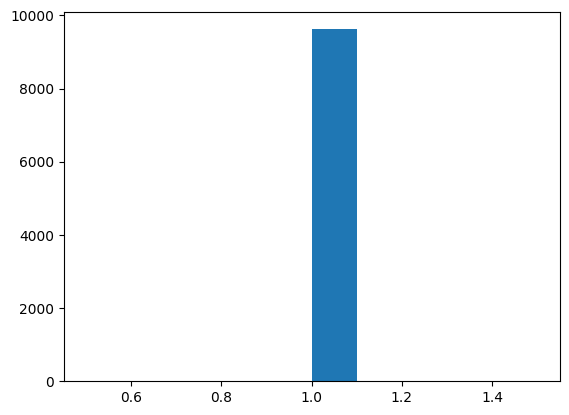

In [6]:
n_keys_per_song = [len(item[4]) for item in songs]
plt.hist(n_keys_per_song)

# Percentage of notes within Major scale

In [7]:
key_to_note = {0: 'C', 1: 'Db', 2: 'D', 3: 'Eb', 4: 'E', 5: 'F', 6: 'Gb', 7: 'G', 8: 'Ab', 9: 'A', 10: 'Bb', 11: 'B'}
key_notes = []
for i in range(12):
    key_notes.append(get_notes_from_major_scale(i))

In [8]:
# check percentage of notes in a key
key = 0

dfs_key = [item[0] for item in songs if item[4][0][0] == key]
key_percentages = {0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: []}
for df in dfs_key:
    for i in range(len(key_notes)):
        percentage = len([note for note in df['Pitch'].values if note in key_notes[i]]) / len(df['Pitch'].values)
        key_percentages[i].append(percentage)

Key: C
Mean percentage of notes in key C: 0.8458766159657024
Mean percentage of notes in key Db: 0.46445817071928475
Mean percentage of notes in key D: 0.5496060530117367
Mean percentage of notes in key Eb: 0.7504746949199861
Mean percentage of notes in key E: 0.34356493754031486
Mean percentage of notes in key F: 0.8534846804460564
Mean percentage of notes in key Gb: 0.29354076717229777
Mean percentage of notes in key G: 0.7534090858778767
Mean percentage of notes in key Ab: 0.6237346579203507
Mean percentage of notes in key A: 0.40268384346646646
Mean percentage of notes in key Bb: 0.8057617753544558
Mean percentage of notes in key B: 0.31340471760547167


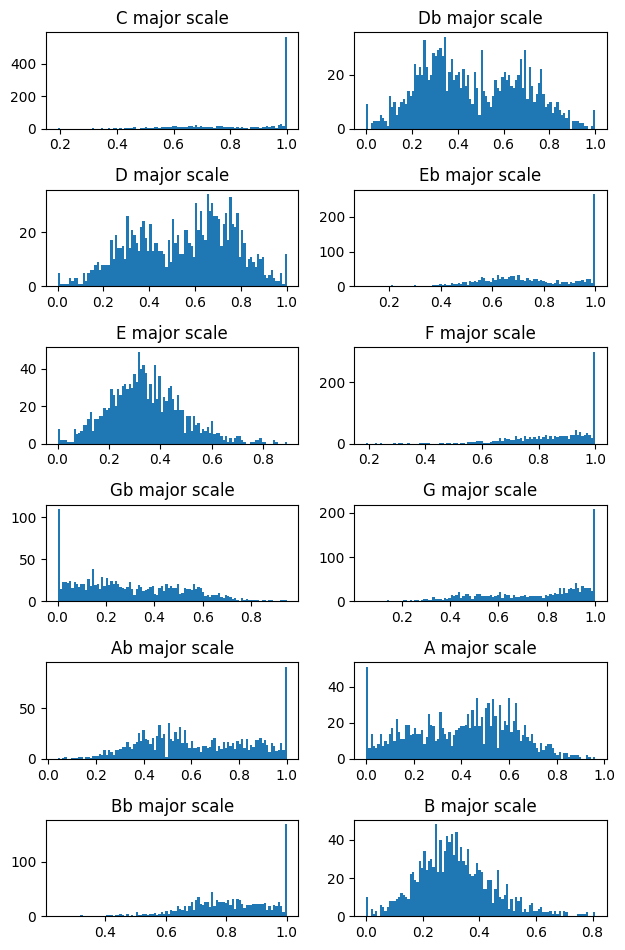

In [9]:
fig, ax = plt.subplots(6, 2, figsize=(6.4, 9.6))
print(f'Key: {key_to_note[key]}')
for i in range(len(key_notes)):
    print(f'Mean percentage of notes in key {key_to_note[i]}: {np.mean(key_percentages[i])}')
    ax[i//2, i%2].hist(key_percentages[i], bins=100)
    ax[i//2, i%2].set_title(f'{key_to_note[i]} major scale')
plt.tight_layout()

In [10]:
# # Filter out songs which have accidentals i.e. notes not in the key
# songs_within_key = []
# for i in range(len(songs)):
#     key = songs[i][4][0][0]
#     key_notes = get_notes_from_major_scale(key)
#     notes = songs[i][0]['Pitch'].values
#     if all([note in key_notes for note in notes]):
#         songs_within_key.append(songs[i])
# len(songs_within_key)

In [11]:
# with open(f'./data/dataframes/{folder}/all_melodies_notes_within_key.pkl', 'wb') as f:
#     pickle.dump(songs_within_key, f)

# Time Signatures

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 9620.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.]),
 array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ,
        1.05, 1.1 , 1.15, 1.2 , 1.25, 1.3 , 1.35, 1.4 , 1.45, 1.5 ]),
 <BarContainer object of 20 artists>)

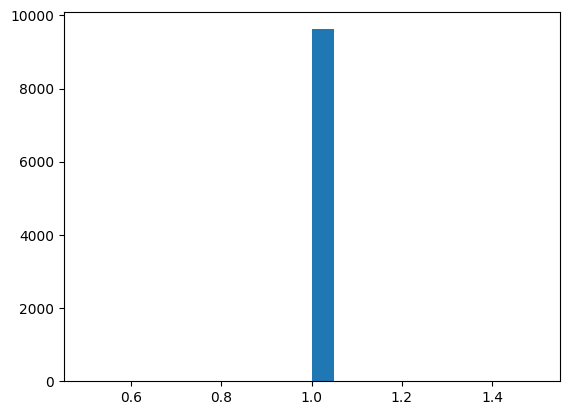

In [12]:
n_signatures_per_song = [len(item[5]) for item in songs]
plt.hist(n_signatures_per_song, bins=20)

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 9620.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.]),
 array([3.5 , 3.55, 3.6 , 3.65, 3.7 , 3.75, 3.8 , 3.85, 3.9 , 3.95, 4.  ,
        4.05, 4.1 , 4.15, 4.2 , 4.25, 4.3 , 4.35, 4.4 , 4.45, 4.5 ]),
 <BarContainer object of 20 artists>)

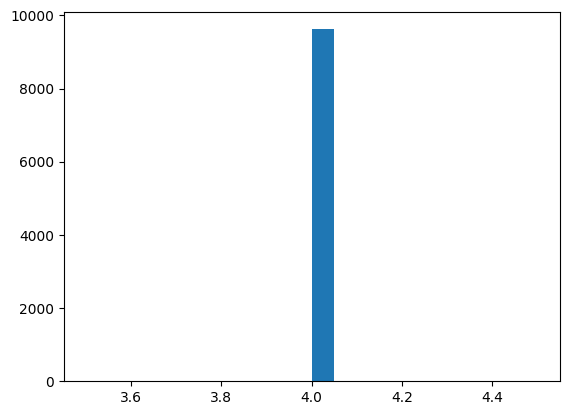

In [13]:
beats_per_bar = [item[5][0][0] for item in songs]
plt.hist(beats_per_bar, bins=20)

(array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0., 9620.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.]),
 array([3.5 , 3.55, 3.6 , 3.65, 3.7 , 3.75, 3.8 , 3.85, 3.9 , 3.95, 4.  ,
        4.05, 4.1 , 4.15, 4.2 , 4.25, 4.3 , 4.35, 4.4 , 4.45, 4.5 ]),
 <BarContainer object of 20 artists>)

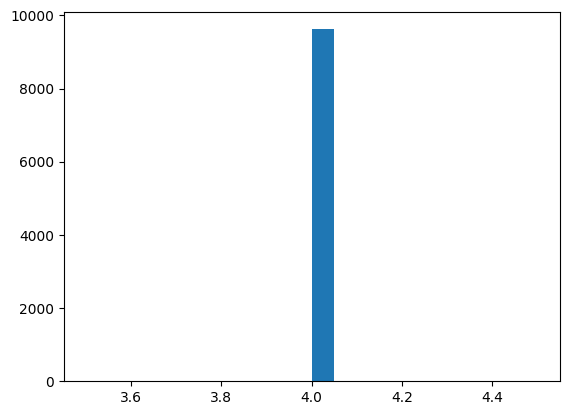

In [14]:
note_value = [item[5][0][1] for item in songs]
plt.hist(note_value, bins=20)

In [15]:
# check that all beats are multiples of the first beat
beats = [item[6] for item in songs]
beats = [item / item[1] for item in beats]
beats = np.concatenate(beats)
beats += 1
beats = beats % beats == 0
beats.all()

True

In [16]:
songs_beats_aligned = []
for song in songs:
    seconds_per_beat = song[6][1]
    df = song[0]
    df.loc[:, ['Start', 'End']] /= seconds_per_beat
    df.loc[:, ['Start', 'End']] *= 0.5
    songs_beats_aligned.append((df, song[1], song[2], song[3][:-4], song[4][0][0])) # df, artist, song-title, segment, key
    # print(seconds_per_beat)
    # print(songs_beats_aligned)
# with open(f'./data/dataframes/{folder}/all_melodies_beats_aligned.pkl', 'wb') as f:
#     pickle.dump(songs, f)

In [17]:
# with open(f'./data/dataframes/{folder}/all_melodies_beats_aligned.pkl', 'rb') as f:
#     songs = pickle.load(f)
# len(songs)

# Number of notes

Number of songs: 7810
Max length: 417
Min length: 31
Mean length: 59.9685019206146


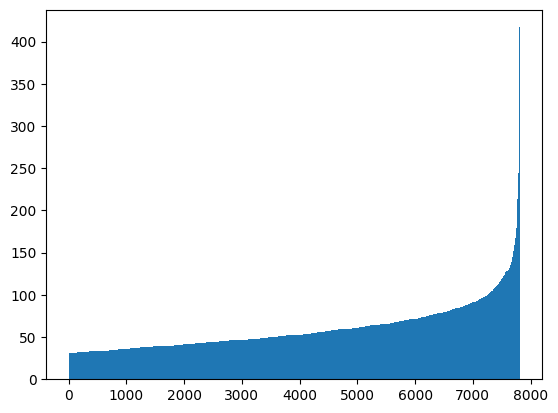

In [18]:
min_length = 30
min_unique_notes = 5
songs = [item for item in songs if len(item[0]) > min_length]
songs = [item for item in songs if item[0]['Pitch'].nunique() > min_unique_notes]
lens = [len(item[0]) for item in songs]
print('Number of songs:', len(songs))
print('Max length:', max(lens))
print('Min length:', min(lens))
print('Mean length:', np.mean(lens))
sorted_lens = sorted(lens)
plt.bar(range(len(sorted_lens)), sorted_lens, width=1.0);

In [19]:
largest_idx = np.argpartition(lens, -4)[-4:]
print(largest_idx)

[ 735 3251 1474 2238]


In [20]:
sample_idx = 756
print(songs[sample_idx][1:4])
midi_data = df_to_midi(songs[sample_idx][0])
fs = 44100
audio_data = midi_data.fluidsynth(fs=fs)
ipd.Audio(audio_data, rate=fs)

('jessica-simpson', 'with-you', 'chorus_symbol_key.mid')


In [22]:
# with open(f'./data/dataframes/{folder}/all_melodies_within_key_beats_aligned_min_5_unique.pkl', 'wb') as f:
#     pickle.dump(songs, f)

In [ ]:
# with open(f'./data/dataframes/{folder}/melodies_beats_min_5_unique.pkl', 'rb') as f:
#     songs = pickle.load(f)
# len(songs)

# Simultaneous notes

In [21]:
# check if there are more than 1 note at the same time
for i, song in enumerate(songs):
    if song[0]['Start'].duplicated().any():
        print(i)

# Duration

(4.0, 152.0)

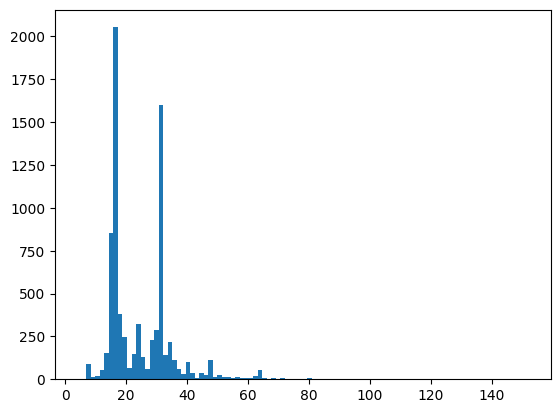

In [22]:
# Duration of melodies
durations = []
for item in songs:
    durations.append(item[0]['End'].max())
plt.hist(durations, bins=100);
min(durations), max(durations)

# Pitch range

Min pitch: 28
Max pitch: 102


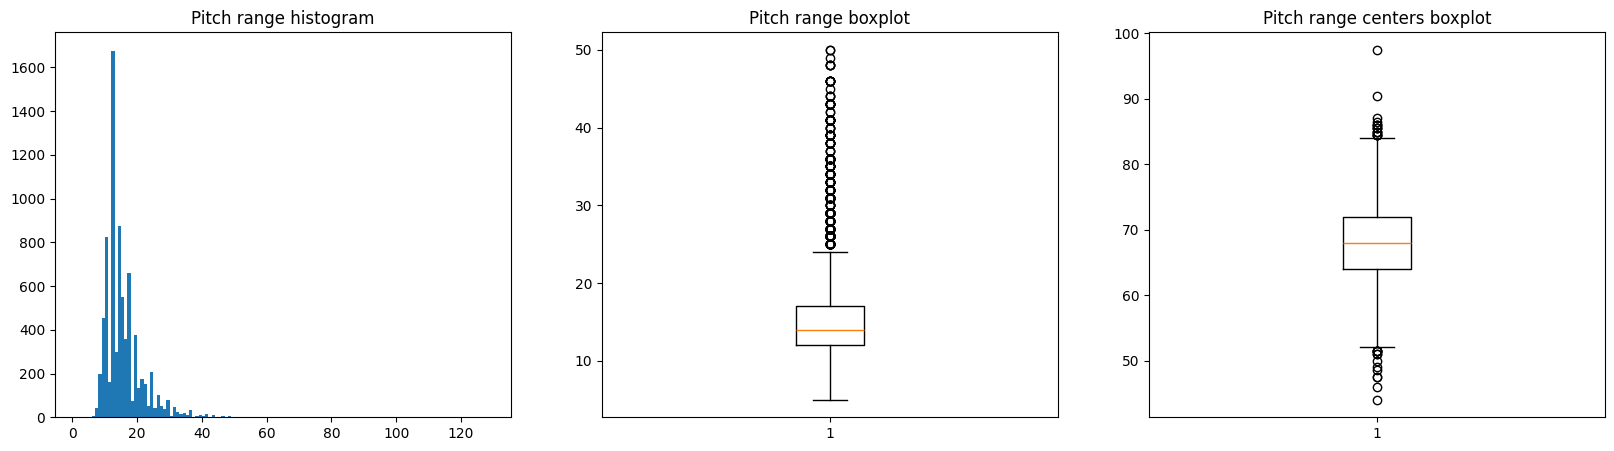

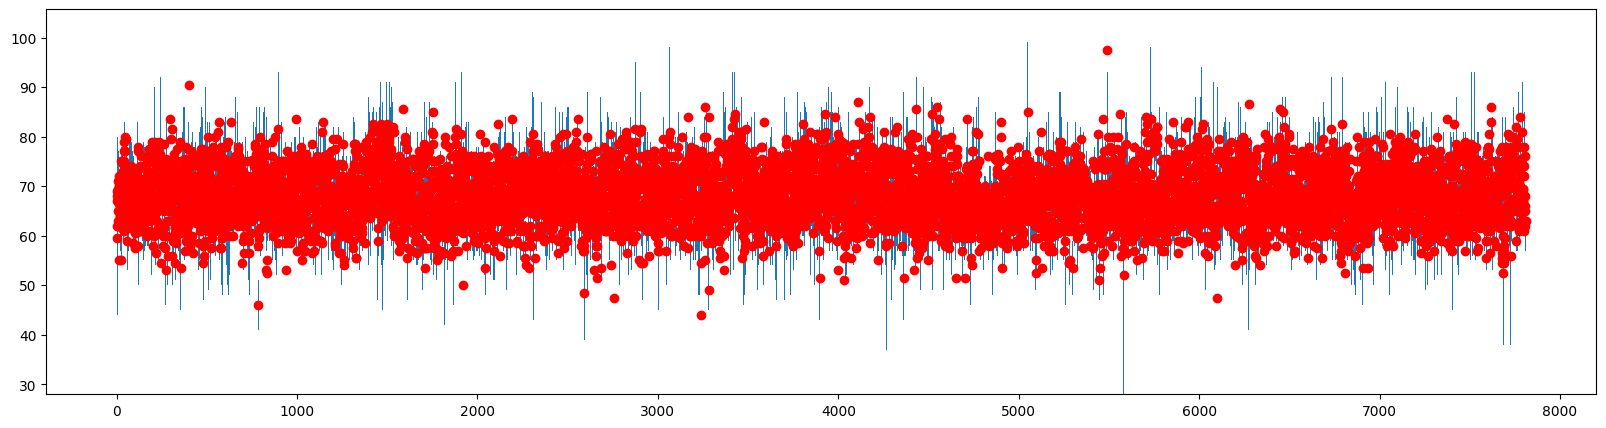

(28, 102)

In [23]:
pitch_range([item[0] for item in songs])

In [24]:
songs2 = trim_by_range(songs, min_range=5, max_range=24)

Min pitch: 37
Max pitch: 102


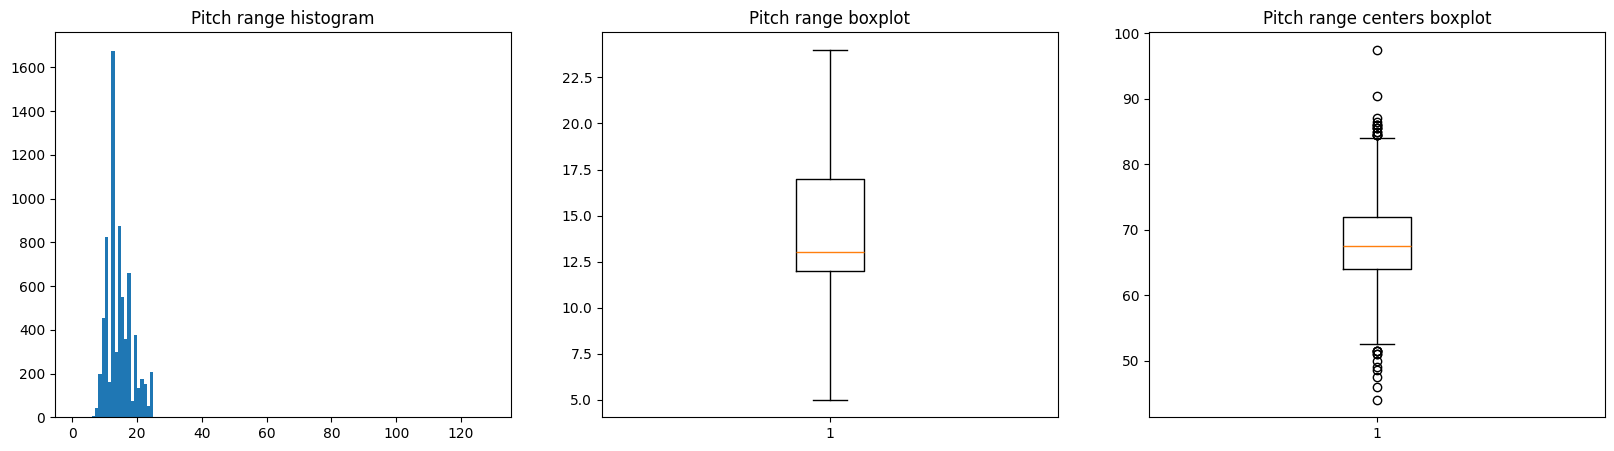

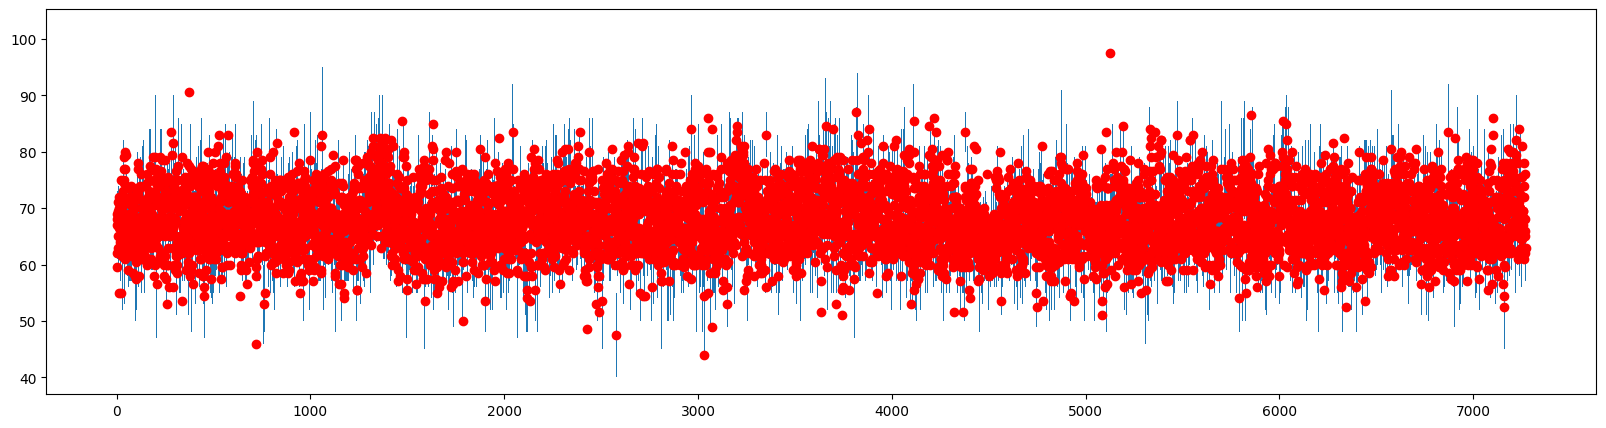

(37, 102)

In [25]:
pitch_range([item[0] for item in songs2])

In [26]:
with open(f'./data/dataframes/{folder}/melodies_beats_min_5_unique_max_range_24.pkl', 'wb') as f:
    pickle.dump(songs2, f)

# Gaps

In [30]:
# measure gap between start of next note and end of previous note
neg_gaps = []
pos_gaps = []
for df in dfs:
    gap = df['Start'].iloc[1:].values - df['End'].iloc[:-1].values
    if gap.min() < 0:
        neg_gaps.append(df)
    if gap.max() > 0:
        pos_gaps.append(df)
print(len(neg_gaps), len(pos_gaps))

0 7879


# Duration + Pitch format

In [ ]:
dfs4 = note_duration_transform(dfs3)

In [ ]:
dfs5, max_pitch = pitch_translation(dfs4)
max_pitch

In [ ]:
pitch_range(dfs5)

In [ ]:
with open(f'./data/dataframes/{key}/dfs_note_dur_offset_{int(max_pitch)}.pkl', 'wb') as f:
    pickle.dump(dfs5, f)

In [ ]:
with open(f'./data/dataframes/{key}/dfs_note_dur_offset_{int(max_pitch)}.pkl', 'rb') as f:
    dfs5 = pickle.load(f)

In [ ]:
dfs5[0]

In [ ]:
dataset = NoteDurationDataset(dfs5, sample_len=20, scale=1., stride=10)
dataloader = DataLoader(dataset, batch_size=64, shuffle=True, num_workers=0, drop_last=True)

In [ ]:
len(dataloader)